In [1]:
import re
from collections import defaultdict

def extract_all_feature_lags(kept_features, forecast_horizon=1):
    qh_parameters = defaultdict(set)
    minute_parameters = defaultdict(set)
    hour_parameters = defaultdict(set)
    # Clean and convert to a list of feature names
    kept_features = [
        f.strip().strip('"').strip("'")
        for f in kept_features.replace("\n", "").split(",")
        if f.strip()
    ]

    for feature in kept_features:
        # ---- QH: match from_qh_minus_X or from_qh_plus_X
        match_qh = re.match(r"(.+)_from_qh_(minus|plus)_(\d+)", feature)
        if match_qh:
            name, sign, lag = match_qh.groups()
            lag = int(lag)
            lag = -lag if sign == "minus" else lag
            qh_parameters[name].add(lag)
            continue

        # ---- QH: match current_qh
        match_qh_current = re.match(r"(.+)_current_qh", feature)
        if match_qh_current:
            name = match_qh_current.group(1)
            qh_parameters[name].add(0)
            continue

        # ---- Minute: match min_from_minute_minus_X or _plus_X
        match_min = re.match(r"(.+)_min_from_minute_(minus|plus)_(\d+)", feature)
        if match_min:
            name, sign, lag = match_min.groups()
            lag = int(lag)
            lag = -lag if sign == "minus" else lag
            name += "_min"  # Append "_min" to the name
            minute_parameters[name].add(lag)
            continue

        # ---- Minute: match min_current_minute
        match_min_current = re.match(r"(.+)_min_current_minute", feature)
        if match_min_current:
            name = match_min_current.group(1)
            name += "_min"  # Append "_min" to the name
            minute_parameters[name].add(0)
            continue

        # ---- Hour: match from_hour_minus_X or from_hour_plus_X
        match_hour = re.match(r"(.+)_from_hour_(minus|plus)_(\d+)", feature)
        if match_hour:
            name, sign, lag = match_hour.groups()
            lag = int(lag)
            lag = -lag if sign == "minus" else lag
            hour_parameters[name].add(lag)
            continue

        # ---- Hour: match current_hour
        match_hour_current = re.match(r"(.+)_current_hour", feature)
        if match_hour_current:
            name = match_hour_current.group(1)
            hour_parameters[name].add(0)
            continue

    # ✅ Ensure forecast_horizon is always added to SI
    qh_parameters["SI"].add(forecast_horizon)

    # Convert sets to sorted lists
    qh_parameters = {k: {"lags": sorted(v)} for k, v in qh_parameters.items()}
    minute_parameters = {k: {"lags": sorted(v)} for k, v in minute_parameters.items()}
    hour_parameters = {k: {"lags": sorted(v)} for k, v in hour_parameters.items()}

    return qh_parameters, minute_parameters, hour_parameters


SBFS - MAE= -76.6027

In [23]:
kept_features ="""GDV_from_qh_minus_1, GDV_from_qh_minus_96, GDV_min_from_minute_minus_2, GEN_DA_from_qh_minus_26, GUV_min_from_minute_minus_2, IGCC+_from_qh_minus_3, IGCC+_min_from_minute_minus_2, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IGCC-_from_qh_minus_3, IP_from_qh_minus_1, IP_from_qh_minus_12, IP_from_qh_minus_13, IP_from_qh_minus_2, IP_from_qh_minus_3, IP_from_qh_minus_4, IP_from_qh_minus_9, IP_from_qh_minus_92, IP_min_from_minute_minus_2, IP_min_from_minute_minus_3, LOAD_DA_current_qh, LOAD_DA_from_qh_plus_1, LOAD_ID_P90_from_qh_plus_3, LOAD_ID_from_qh_minus_3, LOAD_ID_from_qh_plus_1, LOAD_ID_from_qh_plus_2, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, MIP_from_qh_minus_2, MIP_from_qh_minus_3, MIP_from_qh_minus_96, MIP_min_from_minute_minus_3, Month_sin_current_qh, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NETPOS_GB_DA_current_hour, NETPOS_GB_ID_from_hour_plus_1, NRV_from_qh_minus_3, NRV_min_from_minute_minus_3, SI_from_qh_minus_1, SI_from_qh_minus_192, SI_from_qh_minus_193, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_4, SI_from_qh_minus_5, SI_from_qh_minus_93, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_46, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_ID_from_qh_plus_3, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_2, XB_DA_EXP_France_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_IMP_France_current_qh, XB_DA_IMP_Germany_from_qh_plus_1, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_Germany_current_qh, XB_DA_NET_Netherlands_from_qh_minus_2, aFRR+_from_qh_minus_192, aFRR+_from_qh_minus_96, aFRR+_min_from_minute_minus_2, aFRR+_min_from_minute_minus_3, mFRR+_from_qh_minus_3, IP_from_qh_plus_1"""

qh_params_SBFS_IP, min_params_SBFS_IP, hour_parameters_SBFS_IP = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBFS_IP)
print( "minute_parameters=", min_params_SBFS_IP)
print( "hour_parameters=", hour_parameters_SBFS_IP)

qh_parameters= {'GDV': {'lags': [-96, -1]}, 'GEN_DA': {'lags': [-26]}, 'IGCC+': {'lags': [-3]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'IP': {'lags': [-92, -13, -12, -9, -4, -3, -2, -1, 1]}, 'LOAD_DA': {'lags': [0, 1]}, 'LOAD_ID_P90': {'lags': [3]}, 'LOAD_ID': {'lags': [-3, 1, 2]}, 'LOAD_RT': {'lags': [-4, -3]}, 'MIP': {'lags': [-96, -3, -2]}, 'Month_sin': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9]}, 'NRV': {'lags': [-3]}, 'SI': {'lags': [-193, -192, -97, -93, -25, -21, -5, -4, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_ID': {'lags': [3]}, 'WIND_RT': {'lags': [-2, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [1]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_NET_France': {'lags': [-1, 1]}, 'XB_DA_NET_Germany': {'lags': [0]}, 'XB_DA_NET_Netherlands': {'lags': [-2]}, 'aFRR+': {'lags': [-192, -96]}, 'mFRR+': {'lags': [-3]}}
minute_parameters= {'GDV_min': {'lags': [-2]}, 'GUV_min': {'lag

SBS - 72 features - MAE = -76.6037

In [24]:
kept_features = """
GDV_from_qh_minus_1, GDV_from_qh_minus_96, GDV_min_from_minute_minus_2, GEN_DA_from_qh_minus_26, GUV_min_from_minute_minus_2, IGCC+_from_qh_minus_3, IGCC+_min_from_minute_minus_2, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IGCC-_from_qh_minus_3, IP_from_qh_minus_1, IP_from_qh_minus_12, IP_from_qh_minus_13, IP_from_qh_minus_2, IP_from_qh_minus_3, IP_from_qh_minus_4, IP_from_qh_minus_9, IP_from_qh_minus_92, IP_min_from_minute_minus_2, IP_min_from_minute_minus_3, LOAD_DA_current_qh, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_1, LOAD_ID_P90_from_qh_plus_3, LOAD_ID_from_qh_minus_3, LOAD_ID_from_qh_plus_2, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, MIP_from_qh_minus_2, MIP_from_qh_minus_3, MIP_from_qh_minus_96, MIP_min_from_minute_minus_3, Month_sin_current_qh, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NETPOS_GB_DA_current_hour, NETPOS_GB_ID_from_hour_plus_1, NRV_from_qh_minus_3, NRV_min_from_minute_minus_3, SI_from_qh_minus_1, SI_from_qh_minus_192, SI_from_qh_minus_193, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_4, SI_from_qh_minus_5, SI_from_qh_minus_93, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_46, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_ID_from_qh_plus_3, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_2, XB_DA_EXP_France_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_IMP_France_current_qh, XB_DA_IMP_Germany_from_qh_plus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_Germany_current_qh, aFRR+_from_qh_minus_96, aFRR+_min_from_minute_minus_2, aFRR+_min_from_minute_minus_3, mFRR+_from_qh_minus_3,IP_from_qh_plus_1
"""

qh_params_SBS_IP, min_params_SBS_IP, hour_parameters_SBS_IP = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBS_IP)
print( "minute_parameters=", min_params_SBS_IP)
print( "hour_parameters=", hour_parameters_SBS_IP)

qh_parameters= {'GDV': {'lags': [-96, -1]}, 'GEN_DA': {'lags': [-26]}, 'IGCC+': {'lags': [-3]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'IP': {'lags': [-92, -13, -12, -9, -4, -3, -2, -1, 1]}, 'LOAD_DA': {'lags': [-3, 0, 1]}, 'LOAD_ID_P90': {'lags': [3]}, 'LOAD_ID': {'lags': [-3, 2]}, 'LOAD_RT': {'lags': [-4, -3]}, 'MIP': {'lags': [-96, -3, -2]}, 'Month_sin': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9]}, 'NRV': {'lags': [-3]}, 'SI': {'lags': [-193, -192, -97, -93, -25, -21, -5, -4, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_ID': {'lags': [3]}, 'WIND_RT': {'lags': [-2, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [1]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_NET_France': {'lags': [1]}, 'XB_DA_NET_Germany': {'lags': [0]}, 'aFRR+': {'lags': [-96]}, 'mFRR+': {'lags': [-3]}}
minute_parameters= {'GDV_min': {'lags': [-2]}, 'GUV_min': {'lags': [-2]}, 'IGCC+_min': {'lags': [-2]}, 'IP_min': 

SBS - LR

In [4]:
kept_features = """
DayOfWeek_sin_current_qh, GDV_from_qh_minus_192, GDV_min_from_minute_minus_2, GDV_min_from_minute_minus_3, GEN_DA_from_qh_minus_262, GUV_from_qh_minus_1, GUV_min_from_minute_minus_2, GUV_min_from_minute_minus_3, IGCC+_min_from_minute_minus_2, IGCC+_min_from_minute_minus_3, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_3, IGCC-_min_from_minute_minus_2, IGCC-_min_from_minute_minus_3, IP_from_qh_minus_11, IP_from_qh_minus_12, IP_from_qh_minus_2, IP_from_qh_minus_3, IP_from_qh_minus_4, LOAD_DA_current_qh, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_current_qh, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_minus_3, LOAD_ID_P90_from_qh_plus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_current_qh, LOAD_ID_from_qh_minus_3, LOAD_ID_from_qh_plus_1, LOAD_ID_from_qh_plus_2, LOAD_ID_from_qh_plus_3, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, LOAD_RT_from_qh_minus_5, MDP_from_qh_minus_3, MDP_from_qh_minus_4, MDP_from_qh_minus_6, MDP_min_from_minute_minus_2, MDP_min_from_minute_minus_3, MIP_from_qh_minus_3, MIP_from_qh_minus_4, MIP_min_from_minute_minus_2, Month_cos_current_qh, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_14, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NETPOS_GB_DA_from_hour_plus_1, NETPOS_GB_DA_from_hour_plus_2, NRV_from_qh_minus_1, NRV_from_qh_minus_2, NRV_from_qh_minus_3, NRV_from_qh_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_192, SI_from_qh_minus_193, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_96, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_5, SOLAR_ID_current_qh, SOLAR_ID_from_qh_minus_1, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_3, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_P90_current_qh, WIND_P90_from_qh_plus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, WIND_RT_from_qh_minus_6, XB_DA_EXP_France_current_qh, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_EXP_UnitedKingdom_from_qh_minus_1, XB_DA_IMP_France_current_qh, XB_DA_IMP_Germany_from_qh_plus_1, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_from_qh_minus_1, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_Germany_current_qh, XB_DA_NET_Netherlands_from_qh_minus_38, XB_DA_NET_UnitedKingdom_from_qh_plus_1, XB_RT_Germany_from_qh_minus_11, XB_RT_Germany_from_qh_minus_3, XB_RT_Luxembourg_from_qh_minus_3, aFRR+_from_qh_minus_1, aFRR+_from_qh_minus_192, aFRR+_from_qh_minus_6, aFRR+_from_qh_minus_96, aFRR+_min_from_minute_minus_2, aFRR+_min_from_minute_minus_3, aFRR-_from_qh_minus_3, aFRR-_from_qh_minus_7, aFRR-_min_from_minute_minus_2
"""

qh_params_SBS_LR, min_params_SBS_LR, hour_parameters_SBS_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBS_LR)
print( "minute_parameters=", min_params_SBS_LR)
print( "hour_parameters=", hour_parameters_SBS_LR)

qh_parameters= {'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192]}, 'GEN_DA': {'lags': [-262]}, 'GUV': {'lags': [-1]}, 'IGCC-': {'lags': [-3, -1]}, 'IP': {'lags': [-12, -11, -4, -3, -2]}, 'LOAD_DA': {'lags': [-3, -1, 0, 2]}, 'LOAD_ID_P90': {'lags': [-3, -1, 0, 1, 2]}, 'LOAD_ID': {'lags': [-3, 0, 1, 2, 3]}, 'LOAD_RT': {'lags': [-5, -4, -3]}, 'MDP': {'lags': [-6, -4, -3]}, 'MIP': {'lags': [-4, -3]}, 'Month_cos': {'lags': [0]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13, 14]}, 'NRV': {'lags': [-4, -3, -2, -1]}, 'SI': {'lags': [-193, -192, -97, -96, -25, -21, -3, -1, 1]}, 'SOLAR_ID': {'lags': [-1, 0, 2, 3, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_France': {'lags': [0]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [-1, 0]}, 'XB_DA_IMP_France': {'lags': [0]}, 'XB_DA_IMP_Germany': {'lags': [1]}, 'XB_DA_IMP_UnitedKingdom': {'lags':

SBFS - LR - 78 features CV -91.7642

In [5]:
kept_features = """DayOfWeek_sin_current_qh, GDV_from_qh_minus_1, GDV_from_qh_minus_192, IGCC+_min_from_minute_minus_2, IGCC-_from_qh_minus_1, IGCC-_from_qh_minus_2, IGCC-_from_qh_minus_3, IP_from_qh_minus_11, IP_from_qh_minus_12, IP_from_qh_minus_2, IP_from_qh_minus_3, LOAD_DA_from_qh_minus_1, LOAD_DA_from_qh_minus_3, LOAD_DA_from_qh_plus_2, LOAD_ID_P90_from_qh_minus_1, LOAD_ID_P90_from_qh_plus_2, LOAD_ID_P90_from_qh_plus_3, LOAD_ID_current_qh, LOAD_RT_from_qh_minus_3, LOAD_RT_from_qh_minus_4, MDP_from_qh_minus_3, MDP_min_from_minute_minus_2, MIP_from_qh_minus_4, MIP_min_from_minute_minus_2, NETPOS_BE_ID_current_qh, NETPOS_BE_ID_from_qh_plus_1, NETPOS_BE_ID_from_qh_plus_13, NETPOS_BE_ID_from_qh_plus_4, NETPOS_BE_ID_from_qh_plus_8, NETPOS_BE_ID_from_qh_plus_9, NRV_from_qh_minus_3, NRV_from_qh_minus_4, NRV_min_from_minute_minus_4, SI_from_qh_minus_1, SI_from_qh_minus_21, SI_from_qh_minus_25, SI_from_qh_minus_3, SI_from_qh_minus_5, SI_from_qh_minus_96, SI_from_qh_minus_97, SI_min_from_minute_minus_2, SI_min_from_minute_minus_3, SI_min_from_minute_minus_31, SI_min_from_minute_minus_4, SI_min_from_minute_minus_5, SOLAR_ID_from_qh_plus_2, SOLAR_ID_from_qh_plus_4, SOLAR_RT_from_qh_minus_1, SOLAR_RT_from_qh_minus_2, WIND_P90_current_qh, WIND_P90_from_qh_plus_1, WIND_RT_from_qh_minus_1, WIND_RT_from_qh_minus_10, WIND_RT_from_qh_minus_2, WIND_RT_from_qh_minus_3, WIND_RT_from_qh_minus_4, WIND_RT_from_qh_minus_6, XB_DA_EXP_Germany_current_qh, XB_DA_EXP_Germany_from_qh_plus_1, XB_DA_EXP_Netherlands_current_qh, XB_DA_EXP_Netherlands_from_qh_minus_38, XB_DA_EXP_Netherlands_from_qh_minus_45, XB_DA_EXP_Netherlands_from_qh_plus_1, XB_DA_EXP_UnitedKingdom_current_qh, XB_DA_IMP_UnitedKingdom_current_qh, XB_DA_NET_France_current_qh, XB_DA_NET_France_from_qh_minus_1, XB_DA_NET_France_from_qh_plus_1, XB_DA_NET_UnitedKingdom_from_qh_minus_2, XB_DA_NET_UnitedKingdom_from_qh_plus_1, XB_RT_Germany_from_qh_minus_11, XB_RT_UnitedKingdom_from_qh_minus_3, aFRR+_from_qh_minus_1, aFRR+_from_qh_minus_6, aFRR+_from_qh_minus_8, aFRR+_from_qh_minus_96, aFRR-_from_qh_minus_1, aFRR-_from_qh_minus_3"""

qh_params_SBFS_LR, min_params_SBFS_LR, hour_parameters_SBFS_LR = extract_all_feature_lags(kept_features, forecast_horizon=1)
print( "qh_parameters=", qh_params_SBFS_LR)
print( "minute_parameters=", min_params_SBFS_LR)
print( "hour_parameters=", hour_parameters_SBFS_LR)

qh_parameters= {'DayOfWeek_sin': {'lags': [0]}, 'GDV': {'lags': [-192, -1]}, 'IGCC-': {'lags': [-3, -2, -1]}, 'IP': {'lags': [-12, -11, -3, -2]}, 'LOAD_DA': {'lags': [-3, -1, 2]}, 'LOAD_ID_P90': {'lags': [-1, 2, 3]}, 'LOAD_ID': {'lags': [0]}, 'LOAD_RT': {'lags': [-4, -3]}, 'MDP': {'lags': [-3]}, 'MIP': {'lags': [-4]}, 'NETPOS_BE_ID': {'lags': [0, 1, 4, 8, 9, 13]}, 'NRV': {'lags': [-4, -3]}, 'SI': {'lags': [-97, -96, -25, -21, -5, -3, -1, 1]}, 'SOLAR_ID': {'lags': [2, 4]}, 'SOLAR_RT': {'lags': [-2, -1]}, 'WIND_P90': {'lags': [0, 1]}, 'WIND_RT': {'lags': [-10, -6, -4, -3, -2, -1]}, 'XB_DA_EXP_Germany': {'lags': [0, 1]}, 'XB_DA_EXP_Netherlands': {'lags': [-45, -38, 0, 1]}, 'XB_DA_EXP_UnitedKingdom': {'lags': [0]}, 'XB_DA_IMP_UnitedKingdom': {'lags': [0]}, 'XB_DA_NET_France': {'lags': [-1, 0, 1]}, 'XB_DA_NET_UnitedKingdom': {'lags': [-2, 1]}, 'XB_RT_Germany': {'lags': [-11]}, 'XB_RT_UnitedKingdom': {'lags': [-3]}, 'aFRR+': {'lags': [-96, -8, -6, -1]}, 'aFRR-': {'lags': [-3, -1]}}
minute_pa

Comparison analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
def expand_performance_scores(selection_results, base_scores):
    """Assigns normalized base performance scores to each method-resolution key."""
    expanded_scores = {}

    for method, res_dict in selection_results.items():
        score = base_scores.get(method)
        if score is None:
            continue  # skip methods not in the base score dictionary
        normalized_score = score / 100  # normalize to [0, 1]
        for res_key in res_dict:
            expanded_scores[res_key] = normalized_score

    return expanded_scores

def build_weighted_feature_lag_matrix(selection_results, performance_scores):
    from collections import defaultdict, Counter
    import pandas as pd

    matrix = defaultdict(Counter)

    for method, resolution_dict in selection_results.items():
        for res_key, feature_dict in resolution_dict.items():
            score = performance_scores.get(res_key)
            if score is None or not isinstance(feature_dict, dict):
                continue
            for feature, details in feature_dict.items():
                for lag in details.get("lags", []):
                    matrix[feature][lag] += score  # weighted contribution

    df = pd.DataFrame(matrix).fillna(0).T
    return df

def plot_weighted_feature_lag_heatmap(df, top_n_features=None, max_lag_columns=None, cmap="PuBu", hide_zeros=True):
    """Plots a weighted heatmap of features × lags with performance-based scores."""

    # Limit features by total weight
    if top_n_features is not None:
        df["total"] = df.sum(axis=1)
        df = df.sort_values("total", ascending=False).drop(columns="total").head(top_n_features)

    # Limit lags by total weight
    if max_lag_columns is not None:
        lag_totals = df.sum(axis=0).sort_values(ascending=False)
        df = df[lag_totals.head(max_lag_columns).index]

    # Mask for zeros
    mask = df == 0 if hide_zeros else None

    # Annotate only non-zero values
    annot = np.where(df == 0, "", df.round(1).astype(str)) if hide_zeros else df.round(1)

    # Optional: Custom single-color colormap from white to brand color
    # from matplotlib.colors import LinearSegmentedColormap
    # cmap = LinearSegmentedColormap.from_list("custom_blue", ["#ffffff", "#1FABD5"])

    # Plot
    plt.figure(figsize=(12, 0.5 * len(df)))
    sns.heatmap(
        df,
        cmap=cmap,
        annot=annot,
        fmt="",
        cbar=True,
        mask=mask,
        linewidths=0.5,
        linecolor="white"
    )
    plt.xlabel("Lag",fontsize=15)
    plt.ylabel("Feature",fontsize=15)
    plt.tight_layout()
    plt.show()

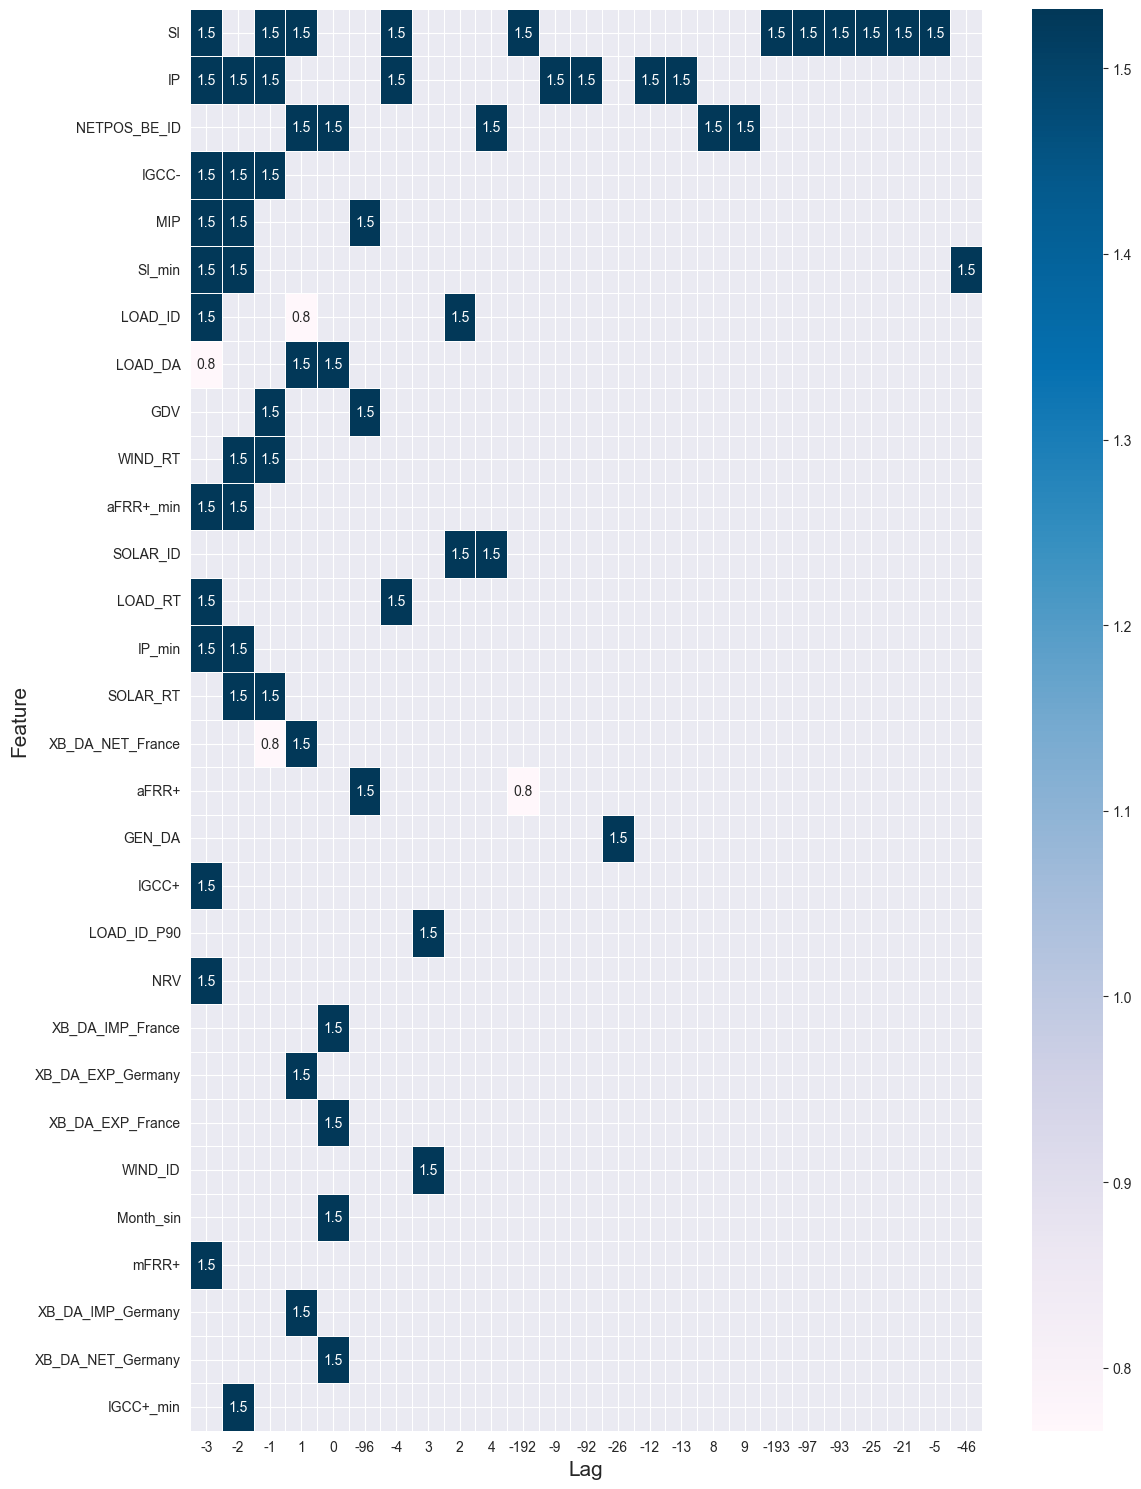

In [7]:
selection_results = {
    "SBS_IP": {
        "SBS_QH": qh_params_SBS_IP,
        "SBS_MIN": min_params_SBS_IP,
        "SBS_HOUR": hour_parameters_SBS_IP},
    "SBFS_IP":{
        "SBFS_QH": qh_params_SBFS_IP,
        "SBFS_MIN": min_params_SBFS_IP,
        "SBFS_HOUR": hour_parameters_SBFS_IP}
    }
performance_scores_raw = {
    "SBS_IP": 76.6,
    "SBFS_IP": 76.6
    }
# Step 1: Expand raw method-level scores to resolution-level
performance_scores = expand_performance_scores(selection_results, performance_scores_raw)

# ✅ Step 2: Build weighted feature × lag matrix
df_weighted = build_weighted_feature_lag_matrix(selection_results, performance_scores)

# ✅ Step 3: Plot the heatmap (this is the only plotting function!)
plot_weighted_feature_lag_heatmap(df_weighted, top_n_features=30, max_lag_columns=30)


In [8]:
def get_selected_features(selection_result):
    """Extracts the selected feature names from the selection result dict or set."""
    if isinstance(selection_result, dict):
        return set(selection_result.keys())
    elif isinstance(selection_result, set):
        return selection_result
    else:
        raise TypeError("Unsupported type for selection_result. Expected dict or set.")


def compute_jaccard_similarity(set1, set2):
    """Computes Jaccard similarity between two sets."""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

def compare_feature_sets(feature_sets: dict, title="Jaccard Similarity Between Feature Sets"):
    """Compares selected feature sets using Jaccard similarity."""
    names = list(feature_sets.keys())
    similarities = []

    for name1, name2 in itertools.product(names, repeat=2):
        set1 = get_selected_features(feature_sets[name1])
        set2 = get_selected_features(feature_sets[name2])
        similarity = compute_jaccard_similarity(set1, set2)
        similarities.append((name1, name2, similarity))

    # Convert to similarity matrix
    df = pd.DataFrame(similarities, columns=["FeatureSet1", "FeatureSet2", "Similarity"])
    pivot = df.pivot(index="FeatureSet1", columns="FeatureSet2", values="Similarity")

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return pivot  # Return similarity matrix if needed
def combine_features_per_method(selection_results):
    """Combines selected features across QH, MIN, and HOUR for each method."""
    combined = {}
    for method, resolutions in selection_results.items():
        all_features = set()
        for res in resolutions.values():
            all_features.update(get_selected_features(res))
        combined[method] = all_features
    return combined
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compute_jaccard(a, b):
    return len(a & b) / len(a | b) if (a | b) else 1.0

def compute_overlap(a, b):
    return len(a & b) / min(len(a), len(b)) if min(len(a), len(b)) else 1.0

def compare_feature_sets(feature_sets, title="Feature Set Similarity", metric="jaccard"):
    methods = list(feature_sets.keys())
    similarity_matrix = pd.DataFrame(index=methods, columns=methods, dtype=float)

    for i in methods:
        for j in methods:
            set_i = set(feature_sets[i])
            set_j = set(feature_sets[j])
            if metric == "jaccard":
                similarity = compute_jaccard(set_i, set_j)
            elif metric == "overlap":
                similarity = compute_overlap(set_i, set_j)
            else:
                raise ValueError("Unsupported metric. Choose 'jaccard' or 'overlap'.")
            similarity_matrix.loc[i, j] = similarity

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix.astype(float), annot=True, fmt=".2f", cmap="Blues")
    plt.show()

    return similarity_matrix



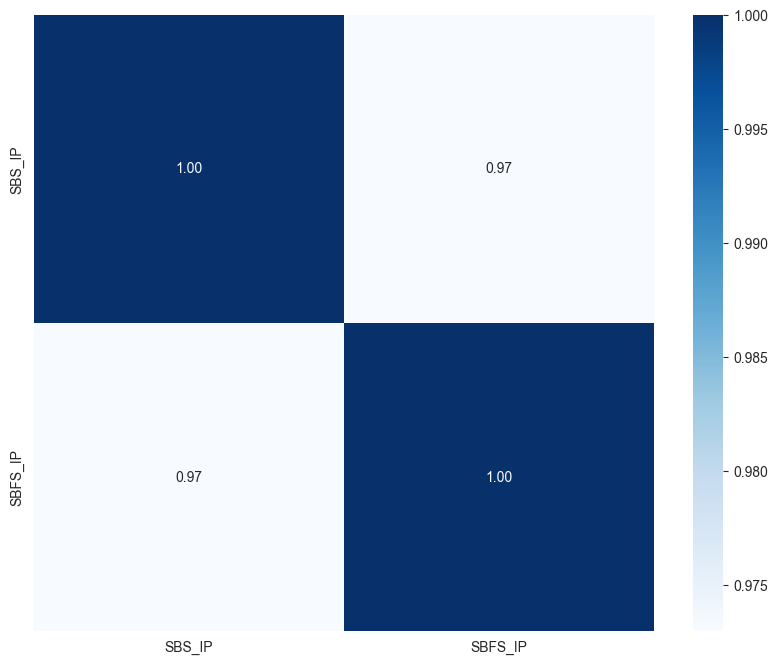

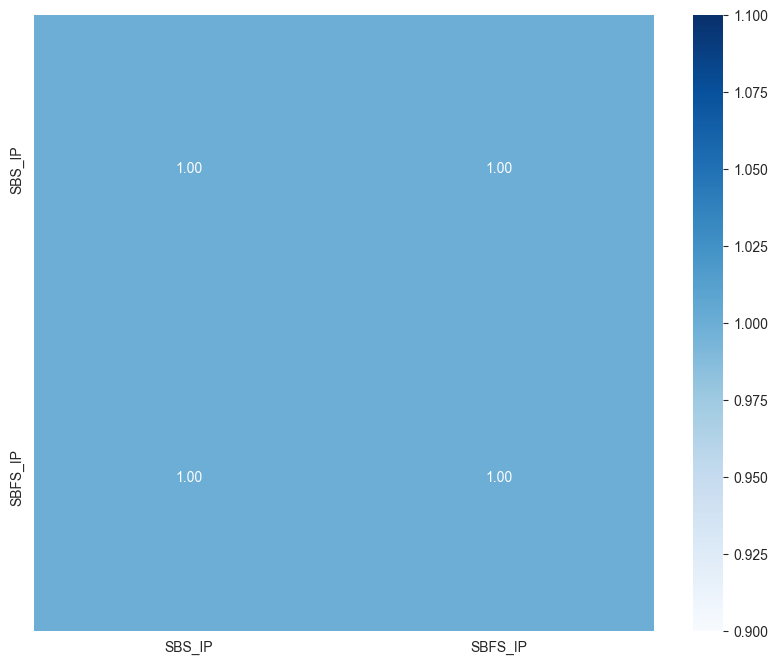

,SBS_IP,SBFS_IP
SBS_IP,1.0,1.0
SBFS_IP,1.0,1.0


In [9]:
combined_feature_sets = combine_features_per_method(selection_results)
compare_feature_sets(combined_feature_sets, title="Jaccard Similarity Between Methods (Combined Features)")
compare_feature_sets(combined_feature_sets, title="Feature Overlap", metric="overlap")

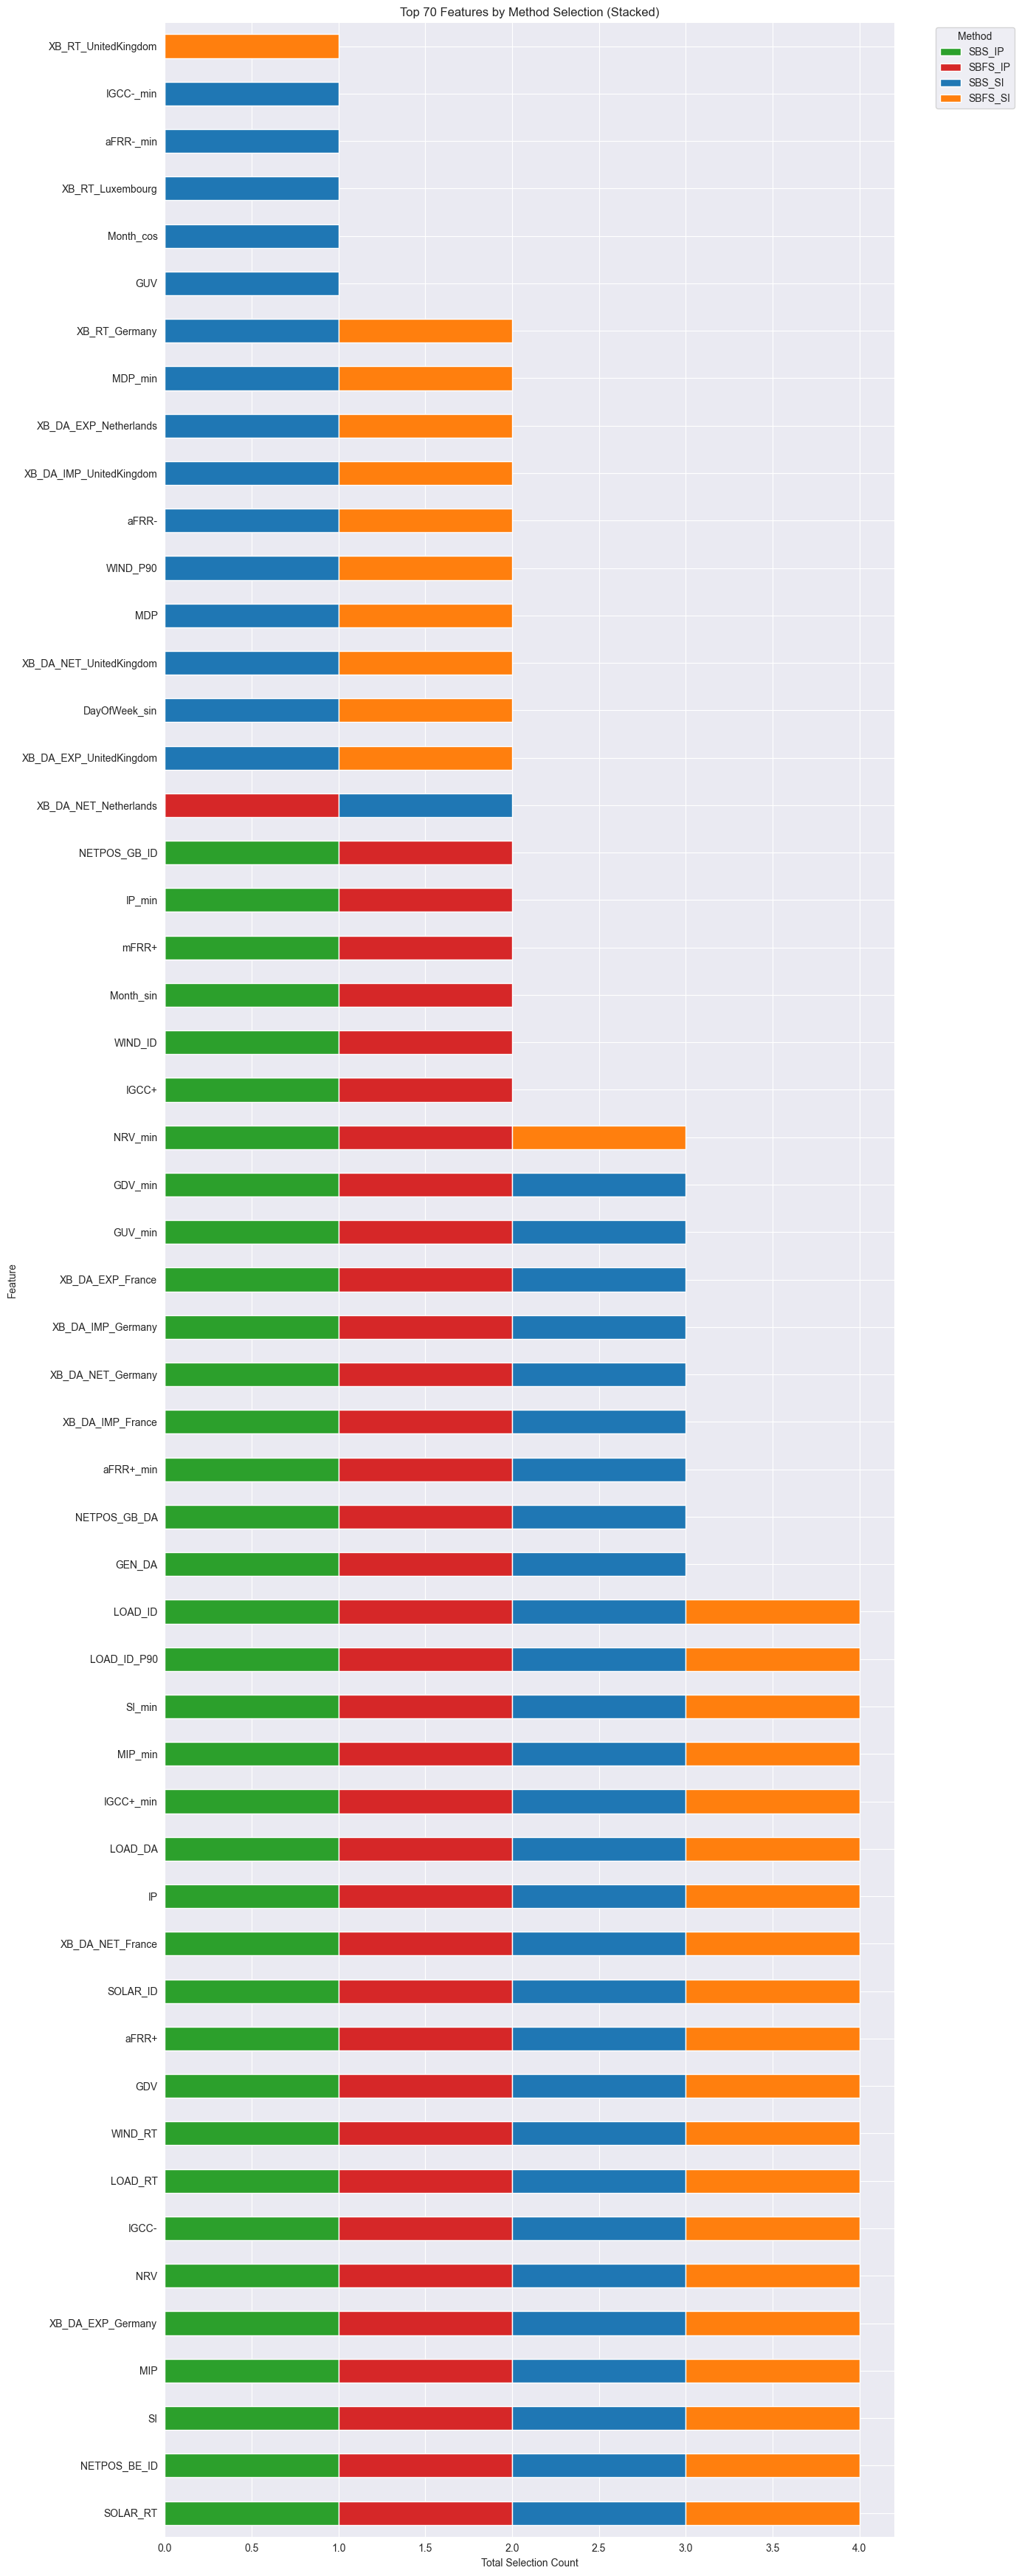

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter, defaultdict

def plot_feature_usage_stacked(selection_results, top_n=30):
    from collections import defaultdict
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Step 1: Count feature occurrences per method
    feature_method_counts = defaultdict(lambda: defaultdict(int))
    for method, resolutions in selection_results.items():
        for res in resolutions.values():
            for feature in get_selected_features(res):
                feature_method_counts[feature][method] += 1

    # Step 2: Build DataFrame
    df = pd.DataFrame(feature_method_counts).T.fillna(0)

    # Step 3: Sum across methods to get top-N
    df["total"] = df.sum(axis=1)
    df_top = df.sort_values("total", ascending=False).head(top_n).drop(columns="total")

    # Step 4: Plot stacked horizontal bar chart
    df_top = df_top.sort_values(by=df_top.columns.tolist(), ascending=False)

    colors = {
        "SBS_SI": "#1f77b4",
        "SBFS_SI": "#ff7f0e",
        "SBS_IP": "#2ca02c",
        "SBFS_IP": "#d62728"
    }

    df_top.plot(
        kind="barh",
        stacked=True,
        figsize=(14, 0.5 * top_n),
        color=[colors[c] for c in df_top.columns]
    )

    plt.xlabel("Total Selection Count")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Features by Method Selection (Stacked)")
    plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

selection_results = {
    "SBS_IP": {
        "SBS_QH": qh_params_SBS_IP,
        "SBS_MIN": min_params_SBS_IP,
        "SBS_HOUR": hour_parameters_SBS_IP},
    "SBFS_IP":{
        "SBFS_QH": qh_params_SBFS_IP,
        "SBFS_MIN": min_params_SBFS_IP,
        "SBFS_HOUR": hour_parameters_SBFS_IP},
    "SBS_SI": {
        "SBS_QH": qh_params_SBS_LR,
        "SBS_MIN": min_params_SBS_LR,
        "SBS_HOUR": hour_parameters_SBS_LR},
    "SBFS_SI":{
        "SBFS_QH": qh_params_SBFS_LR,
        "SBFS_MIN": min_params_SBFS_LR,
        "SBFS_HOUR": hour_parameters_SBFS_LR},
    }
performance_scores_raw = {
    "SBS_IP": 76.6,
    "SBFS_IP": 76.6,
    "SBS_SI": 91.8,
    "SBFS_SI": 91.73,
    }
# Run it:
plot_feature_usage_stacked(selection_results, top_n=70)


In [ ]:
def lag_depth_distribution(selection_results, method):
    from itertools import chain
    lags = []
    for resolution_dict in selection_results[method].values():
        for l in resolution_dict.values():
            lags.extend(l["lags"])
    plt.hist(lags, bins=40)
    plt.title(f"Lag Distribution for {method}")
    plt.xlabel("Lag")
    plt.ylabel("Frequency")
    plt.show()

lag_depth_distribution(selection_results, "SBS_IP")
lag_depth_distribution(selection_results, "SBS_SI")
lag_depth_distribution(selection_results, "SBFS_SI")
lag_depth_distribution(selection_results, "SBFS_IP")



In [29]:
# Core libraries
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter
from mpl_toolkits.mplot3d import Axes3D

# Scikit-learn components
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_absolute_error, root_mean_squared_error
from sklearn.base import clone

# Custom project modules
from source.Tools import setup_device_and_seed
from source.prepare_data import load_and_preprocess_data
from source.join_qh_min_data import join_qh_min_data

n_cores = joblib.cpu_count()

# Initialize device and seed
device_info = setup_device_and_seed(seed=987)
device = device_info["device"]


# Load data
qh, minute, hour = load_and_preprocess_data()


import numpy as np
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true) + np.abs(y_pred)
    denominator = np.where(denominator == 0, np.finfo(float).eps, denominator)

    smape_values = 2 * numerator / denominator
    result = np.mean(smape_values)*100
    return result
def get_top_coef_features(model, features, top_n=50):
    """Return top N features by absolute linear coefficient magnitude."""
    coefs = model.named_steps["linearregression"].coef_
    n_features = len(coefs)
    top_n = min(top_n, n_features)
    return set(np.array(features)[np.argsort(np.abs(coefs))[-top_n:]])


def backtesting_CV_alt(
    model,
    data: pd.DataFrame,
    time_splits: TimeSeriesSplit,
    features: list,
    target: str,
    use_scaler: bool = True,
    n_jobs: int = -1,
    return_per_fold: bool = False,
):
    """
    Alternative backtesting using sklearn.cross_validate.

    Parameters:
      model        : sklearn estimator
      data         : DataFrame containing features+target
      time_splits  : TimeSeriesSplit instance
      features     : list of feature column names
      target       : name of target column
      use_scaler   : whether to wrap model in a StandardScaler pipeline
      n_jobs       : parallel jobs for cross_validate
      return_per_fold: if True, returns a DataFrame of per-sample predictions

    Returns:
      backtest_summary: DataFrame with one row per fold:
        [split, train_MAE, test_MAE, train_RMSE, test_RMSE, train_MAPE, test_MAPE]
      metrics: overall metrics dict same as your original API
      per_sample_df (optional): full y_test vs y_pred for all folds
    """
    start = perf_counter()
    X = data[features]
    y = data[target]

    # build pipeline
    estimator = make_pipeline(StandardScaler(), clone(model)) if use_scaler else clone(model)

    # define scorers
    def rmse(y_true, y_pred): return root_mean_squared_error(y_true, y_pred)
    def mape(y_true, y_pred):
        eps = np.finfo(float).eps
        return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), eps))) * 100

    scorers = {
        'mae': make_scorer(mean_absolute_error, greater_is_better=True),
        'rmse': make_scorer(lambda y, y_pred: root_mean_squared_error(y, y_pred), greater_is_better=True),
        'mape': make_scorer(lambda y, y_pred: np.mean(np.abs((y - y_pred) / np.maximum(np.abs(y), np.finfo(float).eps))) * 100, greater_is_better=True),
        'smape': make_scorer(smape, greater_is_better=False),

    }

    cv_results = cross_validate(
        estimator, X, y,
        cv=time_splits,
        scoring=scorers,
        return_train_score=True,
        n_jobs=n_jobs,
        return_estimator=return_per_fold
    )
    calc_time = perf_counter() - start
    # Assemble a per-fold summary
    summary = []
    n_splits = time_splits.n_splits
    for i in range(n_splits):
        summary.append({
            'split': i,
            'train_MAE': cv_results['train_mae'][i],
            'test_MAE':  cv_results['test_mae'][i],
            'train_RMSE': cv_results['train_rmse'][i],
            'test_RMSE':  cv_results['test_rmse'][i],
            'train_MAPE': cv_results['train_mape'][i],
            'test_MAPE':  cv_results['test_mape'][i],
            'test_SMAPE': cv_results['test_smape'][i],
            'train_SMAPE': cv_results['train_smape'][i],
            'fit_time': cv_results['fit_time'][i],
            'score_time': cv_results['score_time'][i],
        })

    backtest_summary = pd.DataFrame(summary)
    # Overall metrics
    metrics = {
        'train_MAE':  backtest_summary['train_MAE'].mean(),
        'test_MAE':   backtest_summary['test_MAE'].mean(),
        'train_RMSE': backtest_summary['train_RMSE'].mean(),
        'test_RMSE':  backtest_summary['test_RMSE'].mean(),
        'train_MAPE': backtest_summary['train_MAPE'].mean(),
        'test_MAPE':  backtest_summary['test_MAPE'].mean(),
        'test_SMAPE': backtest_summary['test_SMAPE'].mean(),
        'train_SMAPE': backtest_summary['train_SMAPE'].mean(),
        'n_splits':   n_splits,
        'runtime_s': calc_time,
        'total_time_s': calc_time,
        'total_time_fit': backtest_summary['fit_time'].sum(),
        'total_time_score': backtest_summary['score_time'].sum(),
        'total_fold_cpu_time' : backtest_summary['fit_time'].sum() + backtest_summary['score_time'].sum(),
        'efficiency_estimate' : backtest_summary['fit_time'].sum() + backtest_summary['score_time'].sum() / (calc_time * n_cores)
    }

    if return_per_fold:
        # Collect per-sample predictions from each estimator
        per_sample = []
        for i, est in enumerate(cv_results['estimator']):
            train_idx, test_idx = list(time_splits.split(X))[i]
            y_pred = est.predict(X.iloc[test_idx])
            per_sample.append(pd.DataFrame({
                'y_test': y.iloc[test_idx].values,
                'y_pred': y_pred,
                'split': i
            }, index=y.iloc[test_idx].index))
        per_sample_df = pd.concat(per_sample)

        # ✅ Now it's safe to call smape and print detailed values
        print("SMAPE (manual):")
        manual_smape = smape(per_sample_df["y_test"], per_sample_df["y_pred"])
        print(manual_smape)

        return backtest_summary, metrics, per_sample_df



    return backtest_summary, metrics



Using device: cuda
Current device index: 0, GPU name: NVIDIA GeForce RTX 3050 6GB Laptop GPU
Loading data from: C:\Users\jds\OneDrive - KU Leuven\Ku Leuven\Master Semester 5\Thesis\Elia\CSV\quarter_hours_data_2022.01.01_to_2024.01.01.h5
Loading data from: C:\Users\jds\OneDrive - KU Leuven\Ku Leuven\Master Semester 5\Thesis\Elia\CSV\minutes_data_2022.01.01_to_2024.01.01.h5
Loading data from: C:\Users\jds\OneDrive - KU Leuven\Ku Leuven\Master Semester 5\Thesis\Elia\CSV\hours_data_2022.01.01_to_2024.01.01.h5


In [42]:
MINUTE = 3
forecast_horizon = 1

selection_results = {
    "SBS_IP": {
        "SBS_QH": qh_params_SBS_IP,
        "SBS_MIN": min_params_SBS_IP,
        "SBS_HOUR": hour_parameters_SBS_IP},
    "SBFS_IP":{
        "SBFS_QH": qh_params_SBFS_IP,
        "SBFS_MIN": min_params_SBFS_IP,
        "SBFS_HOUR": hour_parameters_SBFS_IP},
    "SBS_SI": {
        "SBS_QH": qh_params_SBS_LR,
        "SBS_MIN": min_params_SBS_LR,
        "SBS_HOUR": hour_parameters_SBS_LR},
    "SBFS_SI":{
        "SBFS_QH": qh_params_SBFS_LR,
        "SBFS_MIN": min_params_SBFS_LR,
        "SBFS_HOUR": hour_parameters_SBFS_LR},
    }
performance_scores_raw = {
    "SBS_IP": 76.6,
    "SBFS_IP": 76.6,
    "SBS_SI": 91.8,
    "SBFS_SI": 91.73,
    }


# Model
model_linear = LinearRegression()

# ----------------------------------------
# TimeSeries CV Setup
# ----------------------------------------
tscv = TimeSeriesSplit(n_splits=36, max_train_size=4 * 24 * 7 * 20, test_size=4 * 24 * 10, gap=0)

# ----------------------------------------
# Model Definitions
# ----------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit
from source.Tools import setup_device_and_seed
from source.prepare_data import load_and_preprocess_data
from source.join_qh_min_data import join_qh_min_data
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
from time import perf_counter


from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

top_n = 100
top_coef_feature_sets = {}
all_feature_weights = {}

def to_none_if_empty(d):
    return d if d else None

for method_name, resolution_dict in selection_results.items():
    # Flatten all features from QH + MIN + HOUR
    qh_p = resolution_dict.get("SBS_QH") or resolution_dict.get("SBFS_QH") or {}
    min_p = resolution_dict.get("SBS_MIN") or resolution_dict.get("SBFS_MIN") or {}
    hour_p = resolution_dict.get("SBS_HOUR") or resolution_dict.get("SBFS_HOUR") or {}
# Determine correct TARGET
    if "SI" in method_name:
        target_var = "SI_from_qh_plus_1" if forecast_horizon == 1 else "SI_current_qh"
    elif "IP" in method_name:
        target_var = "IP_from_qh_plus_1" if forecast_horizon == 1 else "IP_current_qh"
    else:
        raise ValueError(f"Unknown target for method: {method_name}")

    df = join_qh_min_data(
    qh_data=qh,
    minute_data=minute,
    qh_parameters=qh_p,
    minute_parameters=min_p,
    minute=MINUTE,
    hour_data=hour,
    hour_parameters=to_none_if_empty(hour_p),
)
    df = df.dropna()
    df.info(memory_usage="deep", verbose=False)
    TARGET = target_var


    FEATURES = [feature for feature in df.columns if feature != TARGET]
    # Train model
    model = make_pipeline(MinMaxScaler(), LinearRegression())
    model.fit(df[FEATURES], df[TARGET])
    coefs = model.named_steps["linearregression"].coef_  # For full weight storage
    feature_weights = pd.Series(np.abs(coefs), index=FEATURES).sort_values(ascending=False)

    top_coef_feature_sets[method_name] = get_top_coef_features(model, FEATURES, top_n=top_n)
    all_feature_weights[method_name] = feature_weights


feature_weights = pd.Series(np.abs(coefs), index=FEATURES)

Frequency identified as: qh
Frequency identified as: minute
Frequency identified as: minute
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69843 entries, 2022-01-03 00:18:00+00:00 to 2023-12-31 21:33:00+00:00
Columns: 74 entries, GDV_from_qh_minus_96 to NETPOS_GB_ID_from_minute_plus_1
dtypes: float64(74)
memory usage: 40.0 MB
Frequency identified as: qh
Frequency identified as: minute
Frequency identified as: minute
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69843 entries, 2022-01-03 00:18:00+00:00 to 2023-12-31 21:33:00+00:00
Columns: 77 entries, GDV_from_qh_minus_96 to NETPOS_GB_ID_from_minute_plus_1
dtypes: float64(77)
memory usage: 41.6 MB
Frequency identified as: qh
Frequency identified as: minute
Frequency identified as: minute
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69769 entries, 2022-01-03 17:33:00+00:00 to 2023-12-31 20:18:00+00:00
Columns: 114 entries, DayOfWeek_sin_current_qh to NETPOS_GB_DA_from_minute_plus_2
dtypes: float64(114)
memory usage: 

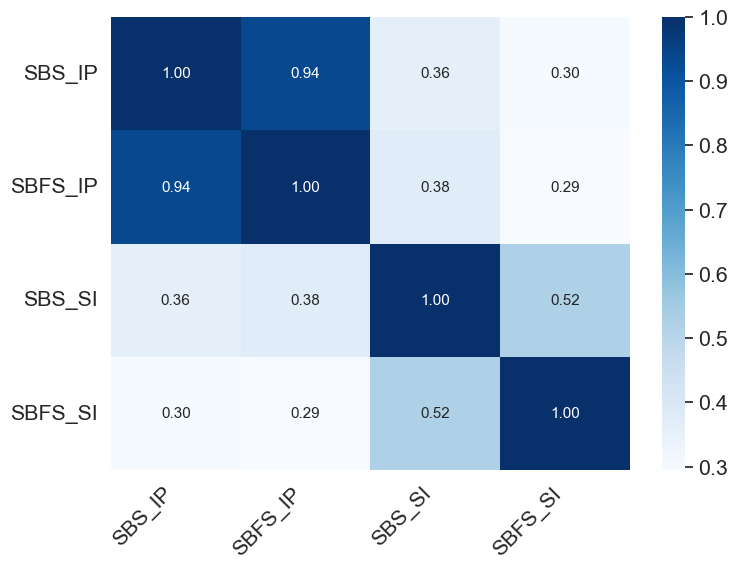

SBS_IP: 73 features selected
SBFS_IP: 76 features selected
SBS_SI: 100 features selected
SBFS_SI: 78 features selected


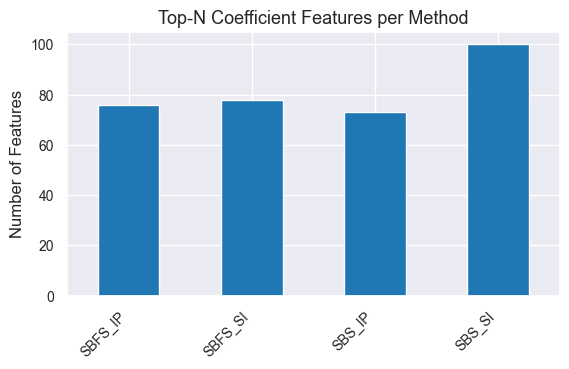

In [46]:
import pandas as pd
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

# All method names
method_names = list(top_coef_feature_sets.keys())

# Initialize empty DataFrame
jaccard_matrix = pd.DataFrame(index=method_names, columns=method_names, dtype=float)

# Fill matrix
for i in method_names:
    for j in method_names:
        set_i = top_coef_feature_sets[i]
        set_j = top_coef_feature_sets[j]
        intersection = len(set_i & set_j)
        union = len(set_i | set_j)
        jaccard_matrix.loc[i, j] = intersection / union if union != 0 else 0.0

# Set font scale for seaborn
sns.set_context("notebook", font_scale=1.4)

# Jaccard heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(jaccard_matrix, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 11})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print number of features selected per method
for method, features in top_coef_feature_sets.items():
    print(f"{method}: {len(features)} features selected")

# Bar plot of number of features
plt.figure(figsize=(6, 4))
pd.Series({k: len(v) for k, v in top_coef_feature_sets.items()}).sort_index().plot(kind='bar')
plt.ylabel("Number of Features", fontsize=12)
plt.title("Top-N Coefficient Features per Method", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
